# 目录

#### 1、模型介绍

#### 2、基于R实现

#### 

# 多层线性模型处理追踪数据：中介分析

所谓中介分析就是探讨 X 对 Y 的影响，是否以及如何通过中介因素（M）起作用。

### 个体内的中介效应分析：

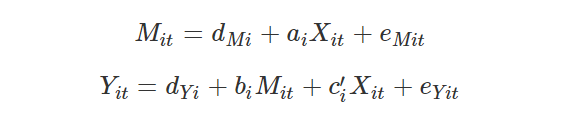

X、M、Y都是个体内变量，i代表某个体，t代表某时间点


#### 接下来我们围绕这样一个例子展开：

每日的工作压力对每日的关系不满意度的影响：工作满意度的中介作用

In [1]:
library(boot) # 使用 boostrap 方法
library(ggplot2) # 可视化
library(nlme) # 多层线性模型建模
library(psych) # 描述数据
library(reshape2) #整理数据 


Warning message:
"程辑包'ggplot2'是用R版本4.2.3 来建造的"
Warning message:
"程辑包'psych'是用R版本4.2.3 来建造的"

载入程辑包：'psych'


The following objects are masked from 'package:ggplot2':

    %+%, alpha


The following object is masked from 'package:boot':

    logit




#### 自变量

fwkstrcw ：女性的工作压力（已做过中心化处理）

fwkdiscw ：女性工作满意度（已做过中心化处理）

#### 结果变量：

freldiscw ：女性关系满意度（已做过中心化处理）

In [2]:
filepath <- "C:/Users/77387/Desktop/Data_analysis_courses/R语言与多层线性模型/B&Lmediation.csv"

data <- read.csv(file = filepath, header = TRUE)

head(data, 10)

,id,time,timec,freldis,fwkdis,fwkstr,fwkstrc,fwkdisc,freldisc,fwkstrcb,fwkdiscb,freldiscb,fwkstrcw,fwkdiscw,freldiscw,x,m,y
,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,101,1,-10,3.034483,5.590119,3,0.03,0.3601189,-1.60551724,-0.3033333,-0.6227591,-0.1634446,0.3333333,0.9828781,-1.4420726,0.3333333,0.9828781,-1.4420726
2,101,2,-9,4.620690,5.535224,3,0.03,0.3052242,-0.01931034,-0.3033333,-0.6227591,-0.1634446,0.3333333,0.9279833,0.1441343,0.3333333,0.9279833,0.1441343
3,101,3,-8,2.850575,3.888381,3,0.03,-1.3416194,-1.78942529,-0.3033333,-0.6227591,-0.1634446,0.3333333,-0.7188603,-1.6259807,0.3333333,-0.7188603,-1.6259807
4,101,4,-7,6.398467,5.352242,4,1.03,0.1222415,1.75846743,-0.3033333,-0.6227591,-0.1634446,1.3333333,0.7450007,1.9219121,1.3333333,0.7450007,1.9219121
5,101,5,-6,2.544061,4.483074,1,-1.97,-0.7469259,-2.09593870,-0.3033333,-0.6227591,-0.1634446,-1.6666667,-0.1241668,-1.9324941,-1.6666667,-0.1241668,-1.9324941
6,101,6,-5,5.164751,3.339433,2,-0.97,-1.8905672,0.52475096,-0.3033333,-0.6227591,-0.1634446,-0.6666667,-1.2678081,0.6881956,-0.6666667,-1.2678081,0.6881956
7,101,7,-4,2.704981,4.135407,3,0.03,-1.0945929,-1.93501916,-0.3033333,-0.6227591,-0.1634446,0.3333333,-0.4718337,-1.7715745,0.3333333,-0.4718337,-1.7715745
8,101,8,-3,5.003831,5.800549,4,1.03,0.5705489,0.36383142,-0.3033333,-0.6227591,-0.1634446,1.3333333,1.1933081,0.5272760,1.3333333,1.1933081,0.5272760
9,101,9,-2,4.099617,5.434584,3,0.03,0.2045837,-0.54038314,-0.3033333,-0.6227591,-0.1634446,0.3333333,0.8273428,-0.3769385,0.3333333,0.8273428,-0.3769385


自变量：fwkstrcw(female work stress centered within person)

中介变量：fwkdiscw(female work dissatisfaction centered within person)

因变量：freldiscw(female relationship dissatisfaction centered within person)

#### 描述个体内变量

In [3]:
vars <- c("fwkstrcw", "fwkdiscw", "freldiscw")

describe(data[, vars])

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
fwkstrcw,1,2100,9.523810e-04,1.0023901,1.006140e-16,-0.003174603,1.2002000,-2.904762,2.952381,5.857143,0.04795743,-0.24827765,0.02187395
fwkdiscw,2,2100,-4.371477e-17,1.1340250,-1.285235e-02,-0.002948053,1.1549204,-3.813445,3.813881,7.627325,0.01725496,-0.10764543,0.02474645
freldiscw,3,2100,-2.202576e-16,0.9945757,-2.189381e-03,-0.002768438,0.9805556,-3.519431,3.222405,6.741835,0.01912420,0.06707451,0.02170342


#### 主效应：自变量（fwkstrcw ）对因变量（freldiscw）的影响

可视化个体内关联

`geom_smooth()` using formula = 'y ~ x'


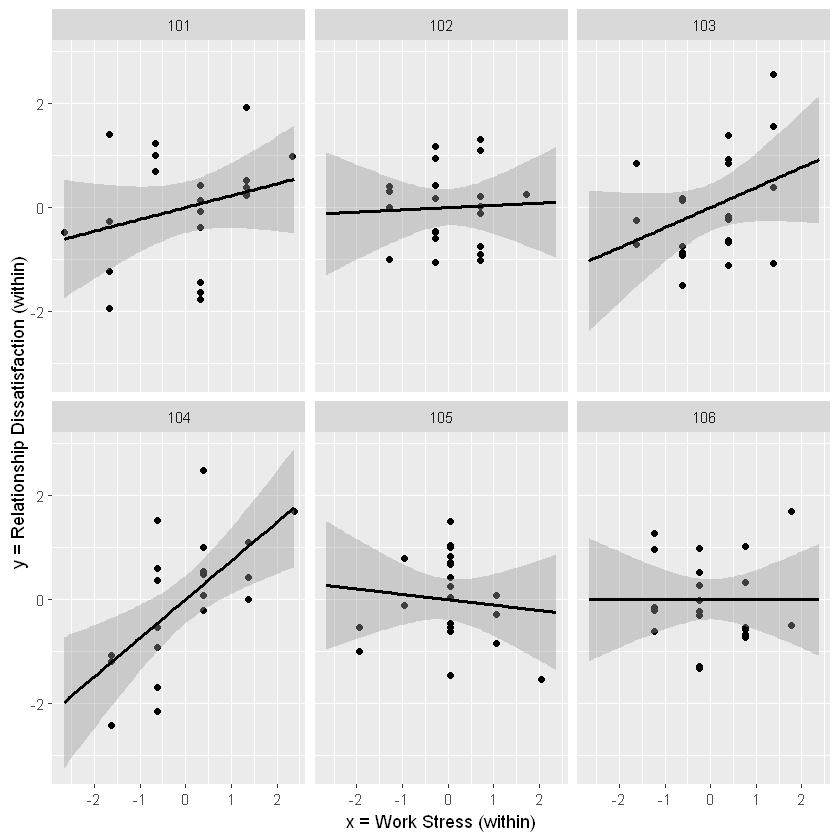

In [4]:
# 女性工作压力（fwkstrcw）对关系不满意度（freldiscw）的影响
ggplot(data = data[which(data$id <= 106), ], 
       aes(x = fwkstrcw, y = freldiscw, group = id)) +
  geom_point(color = "black") + 
  geom_smooth(method = lm, se = TRUE, fullrange = TRUE, color = "black") + 
  xlab("x = Work Stress (within)") +
  ylab("y = Relationship Dissatisfaction (within)") +
  facet_wrap( ~ id)

#### 自变量（fwkstrcw ）对中介因子（fwkdiscw）的影响

`geom_smooth()` using formula = 'y ~ x'


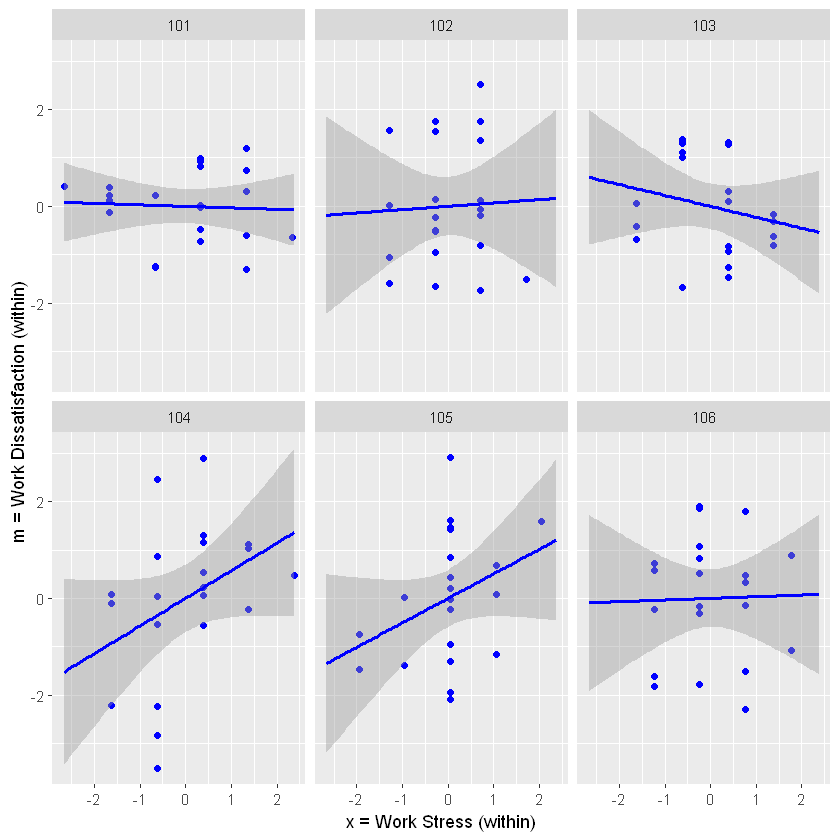

In [5]:
# 女性工作压力对女性工作不满意度的影响, x --> m
ggplot(data = data[which(data$id <= 106),], 
       aes(x = fwkstrcw, y = fwkdiscw, group = id)) +
  geom_point(color = "blue") + 
  geom_smooth(method = lm, se = TRUE, fullrange = TRUE, color = "blue") + 
  xlab("x = Work Stress (within)") +
  ylab("m = Work Dissatisfaction (within)") +
  facet_wrap( ~ id)

#### 中介变量（fwkdiscw ）对因变量（freldiscw）的影响：

`geom_smooth()` using formula = 'y ~ x'


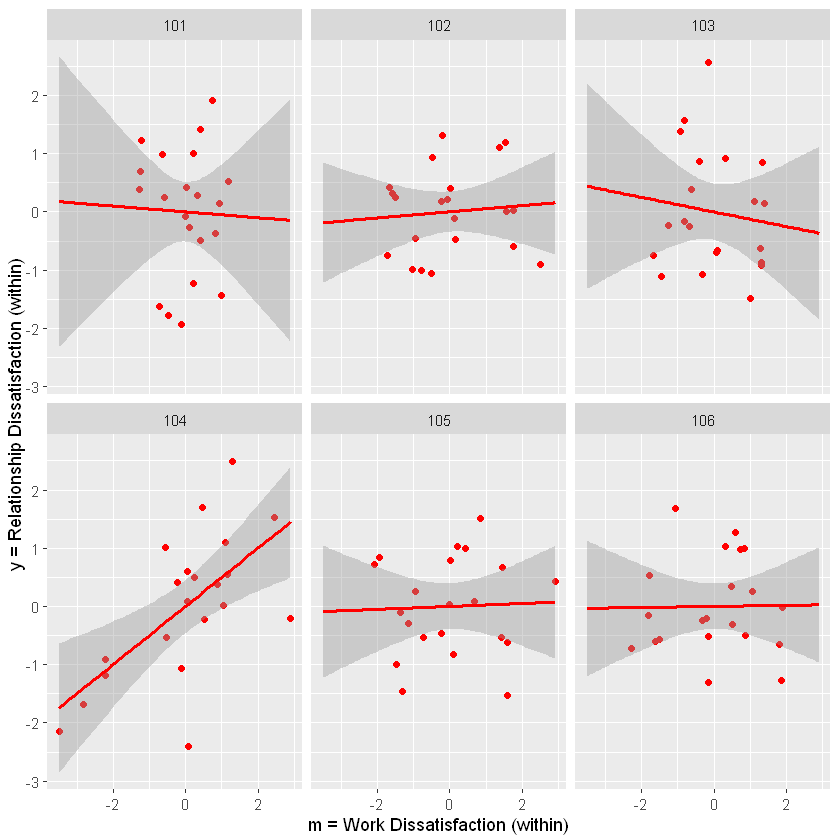

In [6]:
# 女性工作不满意度对女性关系不满意度的影响
ggplot(data = data[which(data$id <= 106),], 
       aes(x = fwkdiscw, y = freldiscw, group = id)) +
  geom_point(color = "red") + 
  geom_smooth(method = lm, se = TRUE, fullrange = TRUE, color = "red") + 
  xlab("m = Work Dissatisfaction (within)") +
  ylab("y = Relationship Dissatisfaction (within)") +
  facet_wrap( ~ id)

# 整理数据

In [7]:
data1 <- data[ , c("id", "time", "timec", "fwkstrcw", "fwkdiscw", "freldiscw")]

# 检查数据集前几行
head(data1, 10)

,id,time,timec,fwkstrcw,fwkdiscw,freldiscw
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,101,1,-10,0.3333333,0.9828781,-1.4420726
2,101,2,-9,0.3333333,0.9279833,0.1441343
3,101,3,-8,0.3333333,-0.7188603,-1.6259807
4,101,4,-7,1.3333333,0.7450007,1.9219121
5,101,5,-6,-1.6666667,-0.1241668,-1.9324941
6,101,6,-5,-0.6666667,-1.2678081,0.6881956
7,101,7,-4,0.3333333,-0.4718337,-1.7715745
8,101,8,-3,1.3333333,1.1933081,0.5272760
9,101,9,-2,0.3333333,0.8273428,-0.3769385


In [11]:
# 新生成x,y,z
data1$x <- data1$fwkstrcw
data1$m <- data1$fwkdiscw
data1$y <- data1$freldiscw
head(data1)
dim(data1)

,id,time,timec,fwkstrcw,fwkdiscw,freldiscw,x,m,y
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,101,1,-10,0.3333333,0.9828781,-1.4420726,0.3333333,0.9828781,-1.4420726
2,101,2,-9,0.3333333,0.9279833,0.1441343,0.3333333,0.9279833,0.1441343
3,101,3,-8,0.3333333,-0.7188603,-1.6259807,0.3333333,-0.7188603,-1.6259807
4,101,4,-7,1.3333333,0.7450007,1.9219121,1.3333333,0.7450007,1.9219121
5,101,5,-6,-1.6666667,-0.1241668,-1.9324941,-1.6666667,-0.1241668,-1.9324941
6,101,6,-5,-0.6666667,-1.2678081,0.6881956,-0.6666667,-1.2678081,0.6881956


[1] 2100    9

In [12]:
#melting data
datalong <- melt(data = data1,
               id.vars = c("id", "time", "timec","fwkstrcw", "fwkdiscw", "freldiscw","x"),
               na.rm = FALSE, 
               variable.name = "dv",
               value.name = "z")

head(datalong)
dim(datalong)

,id,time,timec,fwkstrcw,fwkdiscw,freldiscw,x,dv,z
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,101,1,-10,0.3333333,0.9828781,-1.4420726,0.3333333,m,0.9828781
2,101,2,-9,0.3333333,0.9279833,0.1441343,0.3333333,m,0.9279833
3,101,3,-8,0.3333333,-0.7188603,-1.6259807,0.3333333,m,-0.7188603
4,101,4,-7,1.3333333,0.7450007,1.9219121,1.3333333,m,0.7450007
5,101,5,-6,-1.6666667,-0.1241668,-1.9324941,-1.6666667,m,-0.1241668
6,101,6,-5,-0.6666667,-1.2678081,0.6881956,-0.6666667,m,-1.2678081


[1] 4200    9

In [15]:
# 增加1/0变量
datalong$dy <- ifelse(datalong$dv=="y", 1, 0)
datalong$dm <- ifelse(datalong$dv=="m", 1, 0)

head(datalong)

,id,time,timec,fwkstrcw,fwkdiscw,freldiscw,x,dv,z,dy,dm
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>
1,101,1,-10,0.3333333,0.9828781,-1.4420726,0.3333333,m,0.9828781,0,1
2,101,2,-9,0.3333333,0.9279833,0.1441343,0.3333333,m,0.9279833,0,1
3,101,3,-8,0.3333333,-0.7188603,-1.6259807,0.3333333,m,-0.7188603,0,1
4,101,4,-7,1.3333333,0.7450007,1.9219121,1.3333333,m,0.7450007,0,1
5,101,5,-6,-1.6666667,-0.1241668,-1.9324941,-1.6666667,m,-0.1241668,0,1
6,101,6,-5,-0.6666667,-1.2678081,0.6881956,-0.6666667,m,-1.2678081,0,1


#### 中介模型建模

自变量：fwkstrcw (x) 和 timec

中介变量：fwkdiscw (m)

两个虚拟变量：dm 和 dy



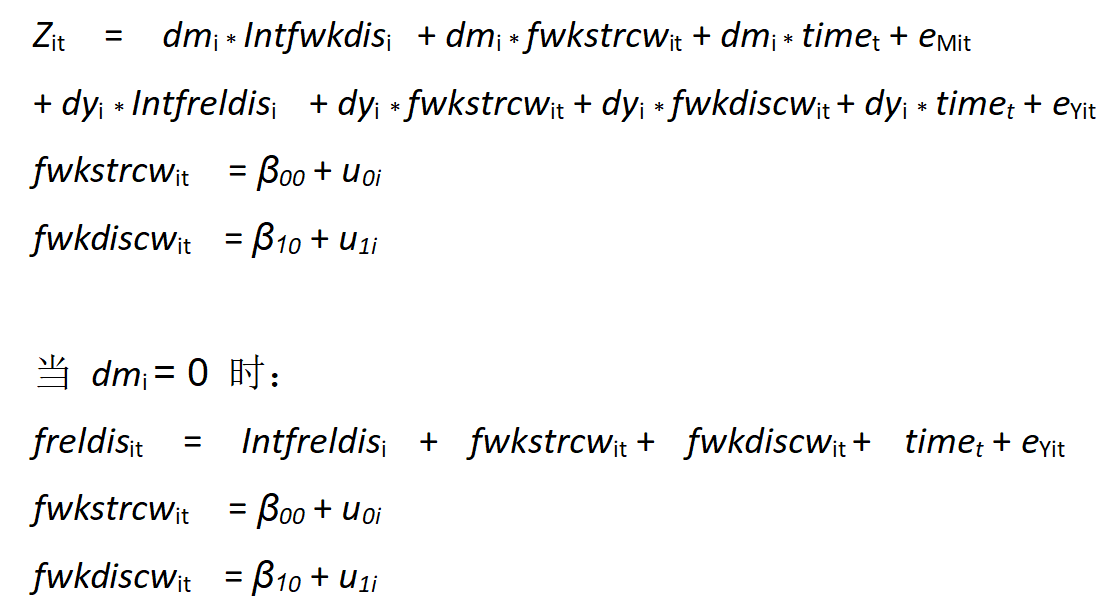
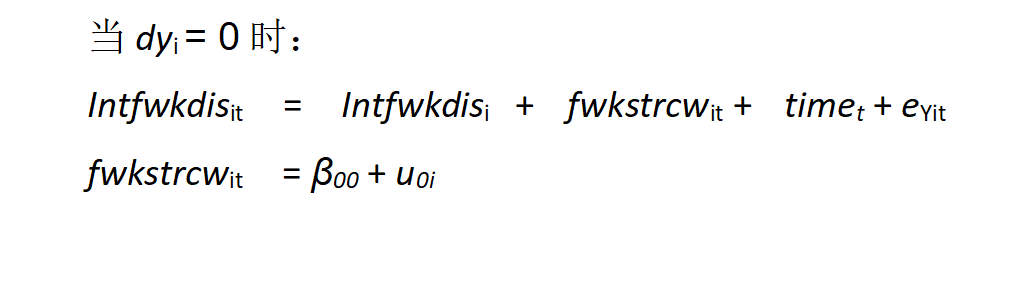

In [17]:
#lmer mediation model
mediationmodel.lmer <- lme(fixed = z ~ -1 + 
                 dm + dm:fwkstrcw + dm:timec +
                 dy + dy:fwkdiscw + dy:fwkstrcw + dy:timec,  
                 
                 random = ~ -1  +  dm:fwkstrcw + dy:fwkdiscw + dy:fwkstrcw | id, 
                 weights = varIdent(form = ~ 1 | dm), #separate sigma^{2}_{e} for each outcome
                 data = datalong,
                 na.action = na.exclude,
                control = lmeControl(opt = "optim", maxIter = 200, msMaxIter = 200, niterEM = 50, msMaxEval = 400))

medmodelsummary <- summary(mediationmodel.lmer)
medmodelsummary

Linear mixed-effects model fit by REML
  Data: datalong 
       AIC      BIC    logLik
  12195.67 12290.79 -6082.837

Random effects:
 Formula: ~-1 + dm:fwkstrcw + dy:fwkdiscw + dy:fwkstrcw | id
 Structure: General positive-definite, Log-Cholesky parametrization
            StdDev     Corr         
dm:fwkstrcw 0.26103020 dm:fwk dy:fwk
dy:fwkdiscw 0.21769909 0.542        
fwkstrcw:dy 0.08798665 0.441  0.932 
Residual    1.08982601              

Variance function:
 Structure: Different standard deviations per stratum
 Formula: ~1 | dm 
 Parameter estimates:
        1         0 
1.0000000 0.8492324 
Fixed effects:  z ~ -1 + dm + dm:fwkstrcw + dm:timec + dy + dy:fwkdiscw + dy:fwkstrcw +      dy:timec 
                  Value  Std.Error   DF   t-value p-value
dm          -0.00000623 0.02378243 4094 -0.000262  0.9998
dy          -0.00011824 0.02019650 4094 -0.005855  0.9953
dm:fwkstrcw  0.19030912 0.03559543 4094  5.346448  0.0000
dm:timec    -0.00583706 0.00397737 4094 -1.467570  0.1423
dy

0.0000224 是 m 为结果变量时的截距

-0.0001127 是 y为结果变量时的截距

0.1909479  是 x(fwkstrcw) 对 m （fwkdiscw）的预测效应

-0.0059983  是 time 对 m 的预测效应（即，m 随时间增长的斜率）

0.1490725  是 m 对 y（freldiscw）的预测效应

0.1042151 是 x 对 y（freldiscw）的预测效应

-0.0024735 是 time 对 y 的预测效应（即，y 岁时间增长的斜率）

#### 提取固定效应

In [18]:
FE <- fixef(model_lme)
FE

dm            dy   dm:fwkstrcw      dm:timec   dy:fwkdiscw 
-6.234340e-06 -1.182449e-04  1.903091e-01 -5.837061e-03  1.478083e-01 
  fwkstrcw:dy      timec:dy 
 1.054828e-01 -2.473016e-03

In [19]:
# 自变量对中介变量的预测路径(a效应)
a <- as.numeric(FE[3])
a

[1] 0.1903091

In [20]:
# 中介变量对因变量的预测路径（b效应）
b <- as.numeric(FE[5])
b

[1] 0.1478083

In [21]:
# 自变量对因变量的直接效应(主效应)
cprime <- as.numeric(FE[6])
cprime

[1] 0.1054828

#### 提取 random effect

In [22]:
VarCorr(model_lme)

id = pdLogChol(-1 + dm:fwkstrcw + dy:fwkdiscw + dy:fwkstrcw) 
            Variance    StdDev     Corr         
dm:fwkstrcw 0.068136768 0.26103020 dm:fwk dy:fwk
dy:fwkdiscw 0.047392895 0.21769909 0.542        
fwkstrcw:dy 0.007741651 0.08798665 0.441  0.932 
Residual    1.187720736 1.08982601              

#### 计算中介效应


In [24]:
# a 的路径效应的 random effect（取 标准差，下同）
sig2_a <- as.numeric(VarCorr(model_lme)[1,2])
# b 的路径效应 random effect
sig2_b <- as.numeric(VarCorr(model_lme)[2,2])

# a, b的correlation
cor_ajbj <- as.numeric(VarCorr(model_lme)[2,3])

# a, b路径的covariance
covajbj <- sig2_a * sig2_b * cor_ajbj
covajbj

[1] 0.03079971

In [25]:
indirecteffect <- a*b + covajbj  
indirecteffect


[1] 0.05892898

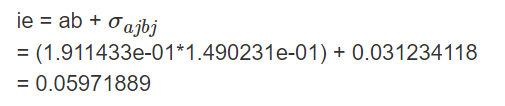

#### 计算总效应

In [26]:
totaleffect <- cprime + a*b + covajbj 
totaleffect

[1] 0.1644117

### 如何计算中介效应的置信区间？

使用蒙地卡罗法

In [27]:
a=0.1911433
b=0.1490231
covajbj=0.03123412
vara=0.001268965
varb=0.0008323414
covab=0.0003114941
varcovajbj=0.0001

In [29]:
# 重复2万次，置信度95%
rep=20000
conf=95
dvec=rnorm(rep) # 随机生成2万数据点的正态分布数据集 dvec
avec=dvec*sqrt(vara)+a  # dvec 乘以 a路径变异（平方） 加 a路径效应
bvec=dvec*covab/sqrt(vara)+sqrt(varb)*rnorm(rep,sd=sqrt(1-(covab^2)/(vara*varb)))+b
cvec=rnorm(rep)*sqrt(varcovajbj)+covajbj
ab=avec*bvec+cvec

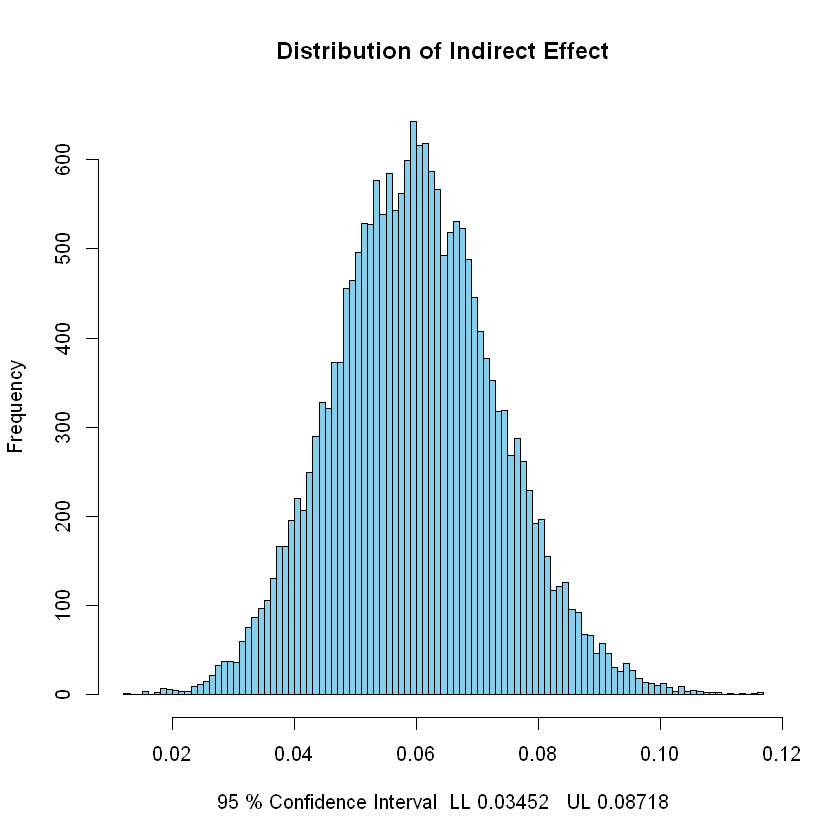

In [30]:

low=(1-conf/100)/2
upp=((1-conf/100)/2)+(conf/100)
LL=quantile(ab,low)
UL=quantile(ab,upp)
LL4=format(LL,digits=4)
UL4=format(UL,digits=4)
################################################
# The number of columns in the histogram can   #
# be changed by replacing 'FD' below with      #
# an integer value.                            #
################################################
hist(ab,breaks='FD',col='skyblue',xlab=paste(conf,'% Confidence Interval ','LL',LL4,'  UL',UL4),
main='Distribution of Indirect Effect')
